# GDPと構成要素

## 始める前に

次のセルの１行目以外をアンコメント（`# `を削除）しなさい。アンコメントするには次の手順に従う。
* Windowsの場合：１行目以外の全ての行を選択し，`Ctrl`を押したまま`/`を押す。
* Macの場合：１行目以外の全ての行を選択し，`command`を押したまま`/`を押す。

In [1]:
# CELL PROVIDED
# %pip install py4macro japanize_matplotlib_jlite
# import statsmodels
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (4, 3)

次のコードを実行しなさい。

In [2]:
import japanize_matplotlib_jlite
import numpy as np
import pandas as pd
import py4macro

## はじめに

使うデータは`py4macro`に含まれる日本の四半期データである。
データを読み込むには次のようにする。
```
py4macro.data('jpn-q')
```
変数の定義を表示するには`description=True`の引数を追加する。

In [3]:
py4macro.data('jpn-q', description=True)


    | `gdp`:         国内総生産（GDP）
    | `consumption`: 消費
    | `investment`:  投資
    | `government`:  政府支出
    | `exports`:     輸出
    | `imports`:     輸入
    | `capital`:     資本ストック
    | `employed`:    就業者数
    | `unemployed`:  失業者数
    | `unemployment_rate`: 失業率
    | `hours`:       労働者一人当たり月平均労働時間
    | `total_hours`: 月平均総労働時間（`employed`X`hours`）
    | `inflation`:   インフレ率
    | `price`:       消費者物価指数
    | `deflator`:    GDPデフレーター
    |
    | * 四半期データ
    |
    | ＜出典＞
    | GDPと各需要項目
    |    * 1994年Q1~2023年Q4
    |        * 実額・四半期・実質季節調整系列（年換算）
    |        * 2015暦年（平成27年）連鎖価格
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |    * 1980年Q1~1993年Q4
    |        * 実額・四半期・実質季節調整系列（年換算）
    |        * 平成27年基準支出側GDP系列簡易遡及（参考系列であり上のデータと接続可能）
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |
    | 実質資本ストック
    |   * 1994年Q1~2023年Q4
    |        * 平成25年基準
    |        * 単位：10億円
    |        * 国民経済計算（GDP統計）
    |   * 1980年Q1~1993年Q4
    |        * 平成25年基準遡及系列
    |        *

データを読み込んで最初の５行を表示してみよう。

In [4]:
df = py4macro.data('jpn-q')
df.head()

,gdp,consumption,investment,government,exports,imports,capital,employed,unemployed,unemployment_rate,hours,total_hours,inflation,price,deflator
,,,,,,,,,,,,,,,
1980-01-01,269747.5,153290.7,65029.2,73039.5,18383.8,24278.8,834219.7,5506.000000,107.666667,1.900000,124.7,686598.200000,5.766667,NaN,91.2
1980-04-01,268521.8,153551.9,65316.6,72164.5,18631.4,25454.5,843000.2,5525.666667,110.000000,1.966667,124.8,689603.200000,8.166667,72.917251,93.4
1980-07-01,274183.1,155580.0,65765.9,72663.8,18449.3,23885.7,854753.4,5561.333333,116.000000,2.033333,124.0,689605.333333,8.200000,73.897654,94.4
1980-10-01,279601.8,156162.4,66017.5,74761.1,19705.4,23716.5,868241.2,5551.333333,123.333333,2.166667,124.0,688365.333333,8.100000,74.767147,95.4
1981-01-01,281995.7,156757.7,66259.0,76127.6,20289.5,24174.1,879629.9,5568.666667,124.333333,2.200000,123.6,688287.200000,6.833333,75.690241,95.6


行はインデックスではなくラベルとなっており，年・四半期を示している
。例えば，`1980-3-31`は1980年第１四半期。

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 176 entries, 1980-01-01 to 2023-10-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gdp                176 non-null    float64
 1   consumption        176 non-null    float64
 2   investment         176 non-null    float64
 3   government         176 non-null    float64
 4   exports            176 non-null    float64
 5   imports            176 non-null    float64
 6   capital            176 non-null    float64
 7   employed           176 non-null    float64
 8   unemployed         176 non-null    float64
 9   unemployment_rate  176 non-null    float64
 10  hours              176 non-null    float64
 11  total_hours        176 non-null    float64
 12  inflation          176 non-null    float64
 13  price              175 non-null    float64
 14  deflator           176 non-null    float64
dtypes: float64(15)
memory usage: 22.0 KB


## GDPとその変化

まずGDPを図示しよう。

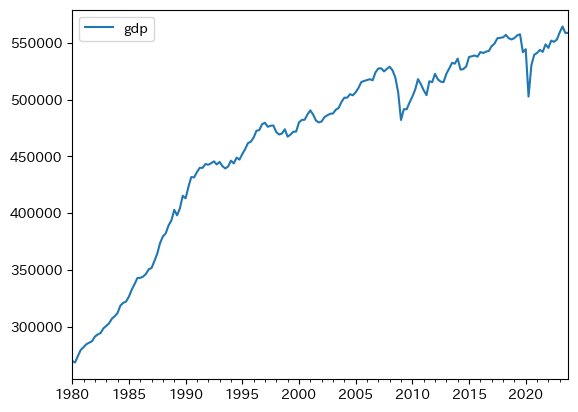

In [6]:
df.plot(y='gdp')
pass

> なぜ景気変動は起こるのか？

上の図はGDPは水準。
GDPの成長率を図で表すために対数化したGDPをプロットする。

変数`x`の成長率$g_x$は次の式で定義される。

$$
1+g_x=\frac{x_{t+1}}{x_{t}}
$$

両辺に対数を取り，近似を使う。

$$
\log(1+g_x)=\log(x_{t+1})-\log(x_{t})
$$

$$
\qquad\qquad\quad\Downarrow\text{左辺を近似}\;\log(1+g_x)\approx g_x
$$

$$
g_x\approx\log(x_{t+1})-\log(x_{t})
$$ (eq:10-log-growth)

縦軸に`x`の対数，横軸に時間をおけば，プロットの傾きは`x`の成長率と等しい

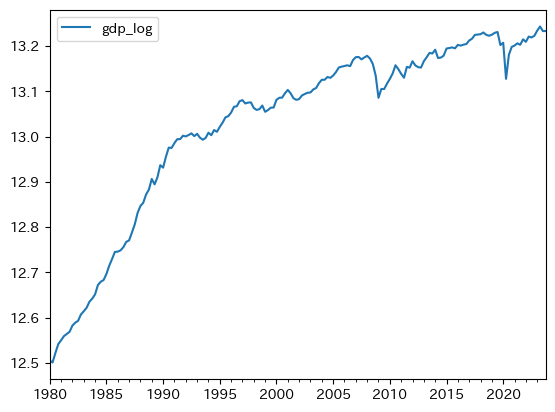

In [7]:
df['gdp_log'] = np.log( df['gdp'] )

df.plot(y='gdp_log')
pass

次に四半期成長率を計算してみよう。`.diff()`は差分を取るメソッド

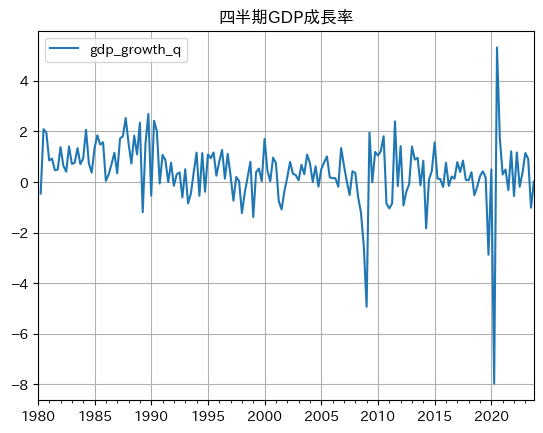

In [8]:
df['gdp_growth_q'] = 100 * df['gdp_log'].diff()

ax_ = df.plot(y='gdp_growth_q', title='四半期GDP成長率')
ax_.grid()
pass

In [9]:
growthq = df['gdp_growth_q']
growthq.max(), growthq.min()

(5.319984734762961, -7.972353937733345)

前年同期比成長率

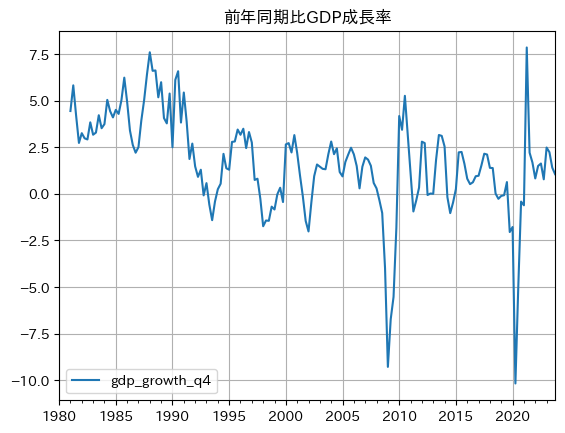

In [10]:
df['gdp_growth_q4'] = 100 * df['gdp_log'].diff(4)

ax_ = df.plot(y='gdp_growth_q4', title='前年同期比GDP成長率')
ax_.grid()
pass

上の図と比べると次の特徴がある。
* 縦軸の幅が違う。１四半期と４四半期（１年）の成長率の違いが反映されている。
* 四半期データの変動は短期的な変化を追うには適している。しかし，変動が激しいため、長期的な成長率の予測には不向きだろう。一方、前年同期比のデータは，景気の基調を捉えるのに適していると言われている。
* データには季節性があり，前年同期比成長率は季節調整されていないデータに使われることが多い。（ちなみに，`df`に含まれる`gdp`のデータは季節調整済みである。）

## GDPの構成要素

所得恒等式
```
    GDP=消費＋投資＋政府支出＋純貿易（輸出ー輸入）
```
対GDP比の推移

In [11]:
# CELL PROVIDED

# 消費の割合
cg_ratio = 100 * df['consumption'] / df['gdp']

# 投資の割合
ig_ratio = 100 * df['investment'] / df['gdp']

# 政府支出の割合
gg_ratio = 100 * df['government'] / df['gdp']

# 純輸出の割合
ng_ratio = 100 * ( df['exports']-df['imports'] ) / df['gdp']

それぞれの平均を`for`ループで計算し表示してみよう。

`for`ループに２つ以上イタラブルぶがある場合に`zip()`を使う。

In [12]:
# CELL PROVIDED

ratio_list = [cg_ratio, ig_ratio, gg_ratio, ng_ratio]
label_list = ['消費','投資','政府支出','純輸出']

for r, l in zip(ratio_list, label_list):
    
    avr = r.mean()
    
    print(f'{l}\t {avr:.1f}％')

消費	 55.5％
投資	 21.7％
政府支出	 25.3％
純輸出	 -1.1％


* 消費はGDPの`60`％近くあり，GDPの約`1/4`が政府支出となっている。
* 消費とは対照的に，投資は約`20`％であり消費の約`1/3`である。

次に推移を確認する。同じように`for`ループを使うと簡単に表示できる。

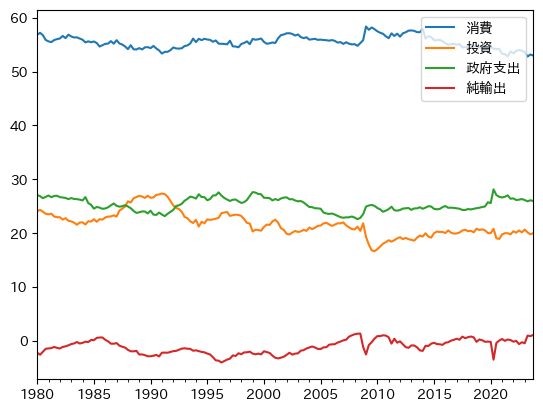

In [13]:
for r, l in zip(ratio_list,label_list):
    
    r.plot(label=l, legend=True)   # r は Series
    
#     r.plot(label=l).legend(loc=(1,0.5))

* 景気の動向によって上下することがわかる。
    * リマン・ショック後には投資が大きく下落し少しずつしか上昇しない。
    * コロナ禍に対応する政府支出の上昇がプロットに現れている。
* 一方，景気悪化に反応し政府支出の割合は上昇している。
* またバブル景気（1986年から1991年まで）ではその逆が起こっており，順位が逆転する程である。コロナ禍の影響もプロットにハッキリと現れている。

## トレンドと変動

### 説明

マクロ変数はトレンドと変動（サイクル）に分解することができる。
* GDPのように長期的なトレンドが右上がりの変数の場合：

    $$
    Y_t=Y_t^{\text{trend}}\times Y_t^{\text{cycle}}
    $$

* 失業率のように右上がりのトレンドがない場合：

    $$
    u_t=u_t^{\text{trend}}+u_t^{\text{cycle}}
    $$

ここで
* $Y_t^{\text{trend}}$と$u_t^{\text{trend}}$は長期的な傾向
* $Y_t^{\text{cycle}}$と$u_t^{\text{cycle}}$は短期的な変動

内閣府は景気循環を「山」と「谷」の２つに分けて[景気基準日付](https://www.esri.cao.go.jp/jp/stat/di/hiduke.html)を発表している。イメージ的には、GDPがトレンドを上回っている期間を「山」，下回っている期間を「谷」と考えて良いだろう。

### トレンドの計算方法

以下では，データを使い景気循環$Y_t^{\text{cycle}}$と$u_t^{\text{cycle}}$の特徴を調べる

#### $Y_t=Y_t^{\text{trend}}\times Y_t^{\text{cycle}}$

対数化し次式に書き換える。

$$
y_t^{\text{cycle}}=y_t-y_t^{\text{trend}}
$$

ここで小文字は大文字の変数を対数化した値である
* $y_t\equiv\log(Y_t)$
* $y_t^{\text{cycle}}\equiv\log(Y_t^{\text{cycle}})$
* $y_t^{\text{trend}}\equiv\log(Y_t^{\text{trend}})$

右辺を次のように近似しよう。

$$
y_t^{\text{cycle}}
=\log\left(\frac{Y_t}{Y_t^{\text{trend}}}\right)
    \approx
    \dfrac{Y_t}{Y_t^{\text{trend}}}-1
    =\dfrac{Y_t-Y_t^{\text{trend}}}{Y_t^{\text{trend}}}
$$

* $y_t^{\text{cycle}}$は変数$Y_t$のトレンドからの乖離の割合を表している。
* $100\times y_t^{\text{cycle}}$は変数$Y_t$のトレンドからの％乖離を表している。

#### $u_t=u_t^{\text{trend}}+u_t^{\text{cycle}}$

$u_t$の変動は次式で与えられる。

$$
u_t^{\text{cycle}}=u_t-u_t^{\text{trend}}
$$ (eq:10-decompose_plus_A)

* トレンドからの乖離$u_t^{\text{cycle}}$の単位は％だが、％が単位となる変数の**差**として計算されているため「％ポイント」と呼ぶ。$100\times\left(\dfrac{u_t}{u_t^{\text{trend}}}-1\right)$として計算された％と区別するための呼称である。

#### `py4macro.trend()`

* トレンド抽出方法：[Hodrick–Prescottフィルター](https://www.google.co.jp/search?q=Hodrick%E2%80%93Prescott%E3%83%95%E3%82%A3%E3%83%AB%E3%82%BF%E3%83%BC)
* `py4macro`に含まれる関数`trend`を使ってトレンド抽出を行うことにする。

In [14]:
help(py4macro.trend)

Help on function trend in module py4macro.py4macro:

trend(s, lamb=1600)
    |
    | 引数:
    |     s: Seriesもしくは１列のDataFrameとし，行のラベルはDatetimeIndexとすること。
    |     lamb: 四半期用のデータでは通常の値（デフォルト：1600）
    |
    | 返り値:
    |     Hodrick-Prescott filterで計算したtrend（トレンド）のSeries
    |
    | 例: py4macro.trend(df.loc[:,'gdp'])



### GDPのトレンドからの乖離率

まずGDPとその構成要素を対数化した変数とそのトレンドを計算し`df`に追加しよう。

In [15]:
# CELL PROVIDED

gdp_lst = ['gdp',
           'consumption',
           'investment',
           'government',
           'exports',
           'imports']

In [16]:
for v in gdp_lst:
    
    df[v+'_log'] = np.log( df.loc[:,v] )  #1
    df[v+'_log_trend'] = py4macro.trend( df.loc[:,v+'_log'] )  #2

`df`の属性`.columns`を使い，列ラベルを表示して確認してみよう。

In [17]:
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'capital', 'employed', 'unemployed', 'unemployment_rate', 'hours',
       'total_hours', 'inflation', 'price', 'deflator', 'gdp_log',
       'gdp_growth_q', 'gdp_growth_q4', 'gdp_log_trend', 'consumption_log',
       'consumption_log_trend', 'investment_log', 'investment_log_trend',
       'government_log', 'government_log_trend', 'exports_log',
       'exports_log_trend', 'imports_log', 'imports_log_trend'],
      dtype='object')

対数化したGDPの変数を作成しトレンドと重ねて図示してみる。

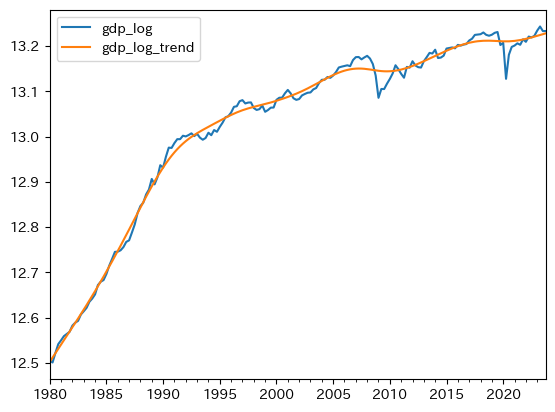

In [18]:
df.plot(y=['gdp_log', 'gdp_log_trend'])
pass

トレンドは直線ではなくスムーズな曲線となっている。上下に動く変数を平滑化したものがトレンドなので直線になるとは限らないのである。

次に景気循環の変数を作成するが，トレンドからの乖離を割合で表すために，上でも使った次の関係を利用する。

$$
\dfrac{Y_t-Y_t^{\text{trend}}}{Y_t^{\text{trend}}}
=\dfrac{Y_t}{Y_t^{\text{trend}}}-1
\approx\log\left(\frac{Y_t}{Y_t^{\text{trend}}}\right)
=\log(Y_t) - \log(Y_t^{\text{trend}})
$$

In [19]:
df['gdp_cycle'] = 100 * ( df['gdp_log'] - df['gdp_log_trend'] )

`0`に横線を引いてプロットしてみよう。

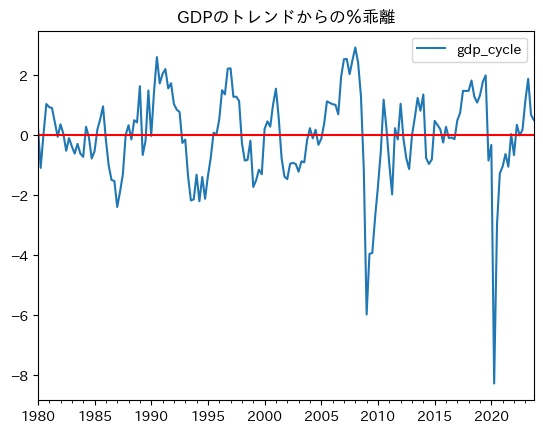

In [20]:
ax_ = df.plot(y='gdp_cycle',
              title='GDPのトレンドからの％乖離')
ax_.axhline(0, color='red')     # 2
pass

まず乖離率の平均を確認してみよう。

In [21]:
df['gdp_cycle'].mean()

2.403834707045214e-11

正と負の乖離率は相殺し平均では`0`に非常に近い値となっている。

図を見ると、乖離率の絶対値は負の方が大きいことが分かる。絶対値で、負の乖離率は正の乖離率の何倍かを計算してみよう。

In [22]:
abs( df['gdp_cycle'].min() ) / df['gdp_cycle'].max()

2.8222940822482196

山よりも谷は`2`倍以上深いことが分かる。

### 構成要素のトレンドからの乖離率

次にGDPの構成要素について考えるが，まずトレンドからの乖離の変数を作成する（単位：％）。

In [23]:
for v in gdp_lst[1:]:   # gdp以外の変数    
    
    df[v+'_cycle'] = 100 * ( df[v+'_log'] - df[v+'_log_trend'] ) 

図示する変数のリスを作成するために，列ラベルを確認しよう。

In [24]:
df.columns

Index(['gdp', 'consumption', 'investment', 'government', 'exports', 'imports',
       'capital', 'employed', 'unemployed', 'unemployment_rate', 'hours',
       'total_hours', 'inflation', 'price', 'deflator', 'gdp_log',
       'gdp_growth_q', 'gdp_growth_q4', 'gdp_log_trend', 'consumption_log',
       'consumption_log_trend', 'investment_log', 'investment_log_trend',
       'government_log', 'government_log_trend', 'exports_log',
       'exports_log_trend', 'imports_log', 'imports_log_trend', 'gdp_cycle',
       'consumption_cycle', 'investment_cycle', 'government_cycle',
       'exports_cycle', 'imports_cycle'],
      dtype='object')

列ラベルに`_cycle`がついている変数だけを選ぶために`cycle_lst`を作成する。

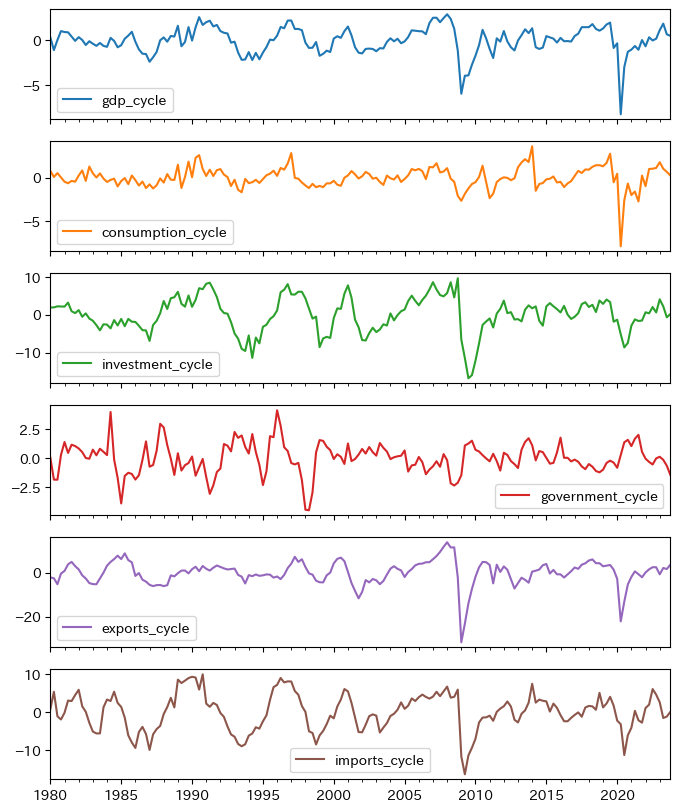

In [25]:
gdp_cycle_lst = df.columns[-6:]   # 最後の6変数
df.plot(y=gdp_cycle_lst, subplots=True, figsize=(8,10))
pass

この図に基づいて次の点について考える。
1. GDPと順循環的（pro-cyclical）か反循環的（counter- cyclical）かどうか
2. 持続性
1. 変動の大きさの比較

## 変動の相関

相関とは，異なる変数が同時にどの方向（正か負）にどの程度動く傾向にあるかを示す。

### 復習

`2`つのランダム変数$X_i$と$Y_i$, $i=1,2,3,\cdots,n$を考えよう。
`2`変数の**不偏分散**は次のように定義される。

$$
\sigma_{X}^2=\frac{1}{n-1}\sum_{i=1}^{n}
\left(X_i-\overline{X}\right)^2
\qquad
\sigma_{Y}^2=\frac{1}{n-1}\sum_{i=1}^{n}
\left(Y_i-\overline{Y}\right)^2
$$

ここで$\overline{X}$と$\overline{Y}$は平均を表し、それぞれの**標準偏差**は

$$
\sigma_{X},
\quad
\sigma_{Y}
$$

となる。

ここでは`2`変数の相関を考えたい訳だが、その尺度として共分散が使われ、次のように定義される。

$$
\sigma_{XY}=\frac{1}{n-1}\sum_{i=1}^{n}
\left(X_i-\overline{X}\right)\left(Y_i-\overline{Y}\right)
$$

符号の解釈：
* $\sigma_{XY}=0$：無相関
* $\sigma_{XY}>0$：正の相関
* $\sigma_{XY}<0$：負の相関

共分散の絶対値が大きければ大きい（小さい）程，相関度が高い（低い）ことを意味する。

また上の定義から次が成立することが簡単に理解できる。

$$
\sigma_{XX}=\sigma_{X}^2,
\qquad
\sigma_{YY}=\sigma_{Y}^2,
$$

共分散の重要な特徴は$X_i$と$Y_i$の単位に依存することであり、それにより単位が異なる`2`つの相関度の比較には向いていない。
その点を克服するのが**相関係数**であり、次のように定義される。

$$
\rho_{XY}=
\frac{\sigma_{XY}}{\sigma_X\sigma_Y}
$$

次の特徴がある。
* 分母は必ず正となるので，分子の共分散が符号を決定する。
* $\rho_{XY}$の値は`-1`から`1`の間の値を取り、単位に依存しない。この特徴は、分母に$X$と$Y$の標準偏差の積を積を置く事により単位をキャンセルしているためである。

$\rho_{XX}$を考えてみよう。

$$
\rho_{XX}=
\frac{\sigma_{XX}}{\sigma_X\sigma_X}
=\frac{\sigma_{X}^2}{\sigma_X^2}
=1
$$

一般的には，$\rho_{XY}$の絶対値は`1`よりも小さな値となる。相関係数の重要な特徴は単位には依存しないため，単位が異なる変数の相関度を比較するには有用な指標となる。

### `.cov`と`.corr()`

`DataFrame`には分散と共分散を計算するメソッド`.cov()`が用意されている。例として、`gdp_cycle`と`consumption_cycle`を抽出して`.cov()`を使ってみよう。

In [26]:
varcov = df[['gdp_cycle', 'government_cycle']].cov()
varcov

,gdp_cycle,government_cycle
gdp_cycle,2.200185,-0.333983
government_cycle,-0.333983,1.735850


`varcov`は分散共分散行列と呼ばれる。
左上と右下の対角線上にあるのは、`gdp_cycle`と`government_cycle`の不偏分散である。
一方、右上と左下の値（同じ値となる）が**共分散**であり、この場合は負の値となっている。

`varcov`を使い相関係数を計算してみよう。

相関係数はメソッド`.corr()`を使って求めることもできる。

In [27]:
df[['gdp_cycle', 'government_cycle']].corr()

,gdp_cycle,government_cycle
gdp_cycle,1.000000,-0.170899
government_cycle,-0.170899,1.000000


### GDPと構成要素との相関係数

GDPと構成要素との相関係数を`for`ループを使って計算しよう。

In [28]:
print('GDPの変動との相関係数\n------------------------')

for v in gdp_cycle_lst:
    
    corr = df[['gdp_cycle', v]].corr().iloc[0,1]  # 1
    print(f'{v:<19}{corr:>5.2f}')                 # 2

GDPの変動との相関係数
------------------------
gdp_cycle           1.00
consumption_cycle   0.77
investment_cycle    0.78
government_cycle   -0.17
exports_cycle       0.76
imports_cycle       0.65


政府支出以外は全て相関係数は正の値であり，値も大きい。即ち，順循環的である（裏にあるメカニズムを考えてみよう）。

一方，政府支出の値は負であり，景気循環をコントロールしようとする政府の政策の現れと解釈できる。GDPのトレンドからの乖離が負の場合、景気対策として政府支出を増やし傾向にある。また、GDPの乖離が正であれば、経済のオーバーヒート（インフレの発生）を避けるために政府支出を減少させると理解できる。

一方、値が小さいのは，時間的なラグがあるためだと思われる。景気に関するデータを集計するには数ヶ月かかり，国会審議や支出の実行にも時間を取られることになる。この点を確認するために，`Series`のメソッド`.shift()`を使って相関係数を再計算してみよう。

In [29]:
print('  GDPとの相関係数\n-----------------------')

for n in range(12):
    
    df['gov_cycle_shift'] = df['government_cycle'].shift(-n)     #1
    
    corr = df[['gdp_cycle', 'gov_cycle_shift']].corr().iloc[0,1]
    
    print(f'{n:>3}期先の政府支出: {corr:>6.3f}')
    
    del df['gov_cycle_shift']                                    #2

  GDPとの相関係数
-----------------------
  0期先の政府支出: -0.171
  1期先の政府支出: -0.318
  2期先の政府支出: -0.392
  3期先の政府支出: -0.396
  4期先の政府支出: -0.327
  5期先の政府支出: -0.277
  6期先の政府支出: -0.149
  7期先の政府支出: -0.026
  8期先の政府支出:  0.074
  9期先の政府支出:  0.122
 10期先の政府支出:  0.126
 11期先の政府支出:  0.124


## 変動の自己相関

次に，変数の変動の自己相関について考える。
自己相関とは，ある変数が，その過去の値によってどの方向（正か負）にどの程度影響を受けるかを示す。

### 復習

既出のランダム変数$X_i$と$Y_i$、$i=1,2,3,\cdots,n$を使い，自己相関について説明する。。
`2`変数の相関度を測る共分散$\sigma_{XY}$は式[](eq:10-covariance)で定義され，相関係数$\rho_{XY}$は式[](eq:10-covariance_coef)で与えられる。

ここで時系列のランダム変数を$\varepsilon_t$として、次の置き換えてみよう。
* $X_i\;\Rightarrow\;\varepsilon_t,\quad t=0,1,2,3,\cdots$
* $Y_i\;\Rightarrow\;\varepsilon_{t-s},\quad s=1,2,3,\cdots$

$\varepsilon_{t-s}$は`s`期遡る過去の値である。
これにより分散は次のように置き換えることができる。

$$
\begin{aligned}
\sigma_X^2&\quad\Rightarrow\quad\sigma_{\varepsilon_t}^2\\
\sigma_Y^2&\quad\Rightarrow\quad\sigma_{\varepsilon_{t-s}}^2
\end{aligned}
$$

$X_i$と$Y_i$の分散は，`s`期ずれているだけの同じランダム変数$\varepsilon$の分散に置き換わっている。
更に，共分散は次のように置き換える事ができる。

$$
X_i\text{と}Y_i\text{の共分散}=\sigma_{XY}
\quad\Rightarrow\quad
\sigma_{\varepsilon_t,\varepsilon_{t-s}}
=s\text{期間離れた}\varepsilon\text{の自己共分散}
$$

即ち，自己共分散はランダム変数とその変数の`s`期前の値との**自己相関**の度合を示す指標ということになる。

これらの結果を使うと，$\varepsilon_t$の相関係数は

$$
\rho_{\varepsilon}(s)
\equiv
\rho_{\varepsilon_t,\varepsilon_{t-s}}
=\frac{
    \sigma_{\varepsilon_t,\varepsilon_{t-s}}
    }{
    \sigma_{\varepsilon_t}
    \sigma_{\varepsilon_{t-s}}
    }
$$

で与えられ，一般的には**自己相関関数**と呼ばれる。「関数」と呼ばれる理由は，$\rho_{\varepsilon}(s)$は`s`の関数として考えることができるためだ。このサイトでは，`s=1`の場合は自己相関係数と呼ぶ事にする。呼称よりも重要なのが解釈である。解釈は次のようになる。
* $\rho_{\varepsilon}(s)=0,\;s=1,2,3,\cdots$：何期離れたとしても自己相関はなしという意味である。過去の影響は皆無の状況を指している。
* $\rho_{\varepsilon}(s)>0,\;s=1,2,3,\cdots$：今期と`s`期前の値は正の相関があるということを示す。$\varepsilon_{t-s}$の値が大きければ（小さければ），$\varepsilon_{t}$も大きい（小さい）傾向にあるという意味であり，`s`期前の影響が強ければ，自己相関係数の絶対値は大きくなる。経済学では`s=1`を考える場合が多く，この性質を**持続性**（persisitence）と呼ぶ。持続性は多くのマクロ変数の重要な特徴となっている。
* $\rho_{\varepsilon}(s)<0,\;s=1,2,3,\cdots$：今期と`s`期前の値は負の相関があるということを示す。$\varepsilon_{t-s}$の値が大きければ（小さければ），$\varepsilon_{t}$は小さい（大きい）傾向にあるという意味であり，`s`期前の影響が強ければ，自己相関係数の絶対値は大きくなる。

### `.autocorr()`：GDPの場合

In [30]:
df['gdp_cycle'].autocorr()

0.6974503788764267

この数値は持続性を意味し，今期のGDPのトレンドからの乖離が正（負）であれば、来季もそれが続く傾向にあることを意味する。

### GDPの構成要素

`gdp_cycle`を含めて次の変数を考えよう。

In [31]:
gdp_cycle_lst

Index(['gdp_cycle', 'consumption_cycle', 'investment_cycle',
       'government_cycle', 'exports_cycle', 'imports_cycle'],
      dtype='object')

`for`ループを使い、自己相関係数を計算してみよう。

In [32]:
for v in gdp_cycle_lst:
    
    autocorr = df[v].autocorr()       #1
    print(f'{v:<19}{autocorr:.3f}')   #2

gdp_cycle          0.697
consumption_cycle  0.489
investment_cycle   0.836
government_cycle   0.641
exports_cycle      0.749
imports_cycle      0.821


消費を除いて全て0.5以上であり，全ての変数で持続性が確認できる。
特に、投資と輸入の持続性は高いことが分かる。

### インフレ率と失業率

次に、失業率とインフレ率の持続性を確認する。

In [33]:
for v in ['inflation', 'unemployment_rate']:
    
    autocorr = df[v].autocorr()
    print(f'{v:<25}{autocorr:.3f}')

inflation                0.947
unemployment_rate        0.992


非常に強い持続性が確認できる。一旦、インフレ率と失業率が長期的なトレンドから乖離すると、元に戻るには時間が掛かることを意味している。更には、財政政策と金融政策によるマクロ経済政策の効果が現れてくるには時間が掛かることを示唆しているおり、経済安定化政策の難しさを示唆する数値となっている。

## 変動の大きさ

次に変動の大きさを考えるために，GDPの標準偏差に対するそれぞれの構成要素の標準偏差の比率を計算しよう。

In [34]:
for v in gdp_cycle_lst:
    
    var = df[v].std() / df['gdp_cycle'].std()
    print(f'{v:<19}{var:>5.2f}')

gdp_cycle           1.00
consumption_cycle   0.81
investment_cycle    3.15
government_cycle    0.89
exports_cycle       3.76
imports_cycle       3.26


投資，輸出，輸入の値はGDPの3倍以上であり，政府支出の値はGDPより低く，消費の変動は更に小さい。これは消費者の不確実性を嫌う姿勢が反映されていると解釈できる。GDPの構成要素を対GDP比率で検討した際，消費は投資よりも比率が大きかったことを思い出そう。変動に関しては，順位が逆転し投資が大きく上回っている。この点を図示して視覚的に確認してみよう。

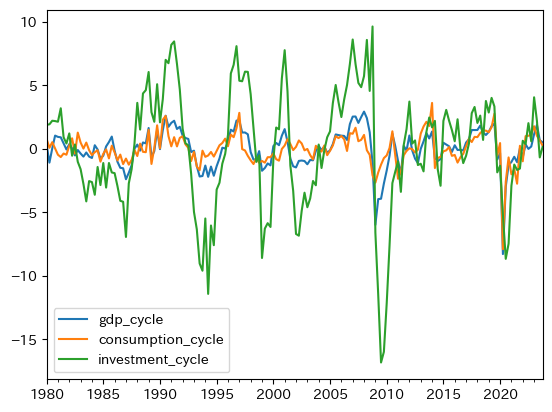

In [35]:
df.plot(y=gdp_cycle_lst[:3])
pass

これらの結果を説明するために，効用最大化に基づく消費者理論があり，利潤最大化に基づく企業行動に関するモデルが使われている。